This notebook documents my initial attempts to use xgboost and tune the parameters. I assume that the optimisation problem is embarassingly parallel so I can tune each parameter one at a time and save on computational power.

In [1]:
import xgboost as xgb
import pandas as pd
import numpy as np

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv('Data/train.csv')

In [3]:
fraud = train['isFraud']
X_train = train.drop('isFraud',axis=1)
del train

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_train, fraud, test_size = 0.75, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.666666, shuffle=False)

In [5]:
#Changing some settings to prevent xgboost from killing the kernal
#see https://stackoverflow.com/questions/51164771/python-xgboost-kernel-died
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

The first parameter we will tune is the learning rate with default values for all other parameters. We will then proceed sequentially through n_estimators, max_depth, gamma, colsample_bytree and then to early_stopping_rounds. early_stopping_rounds will need to be tuned with an extra test set on top of the validation set.

In [24]:
etas = [0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7]

model_results = []

for eta in etas:
    
    eval_set = [(X_val,y_val)]
    
    model = xgb.XGBClassifier(
    learning_rate = eta,
    objective = 'binary:logistic')
    
    model.fit(X_train, y_train, 
          eval_metric = "auc", 
          eval_set= eval_set,)
    
    model_results.append(model.evals_result())


[0]	validation_0-auc:0.728976
[1]	validation_0-auc:0.730959
[2]	validation_0-auc:0.730887
[3]	validation_0-auc:0.730932
[4]	validation_0-auc:0.730896
[5]	validation_0-auc:0.730949
[6]	validation_0-auc:0.730943
[7]	validation_0-auc:0.730972
[8]	validation_0-auc:0.762043
[9]	validation_0-auc:0.762028
[10]	validation_0-auc:0.762028
[11]	validation_0-auc:0.762495
[12]	validation_0-auc:0.762513
[13]	validation_0-auc:0.762518
[14]	validation_0-auc:0.762526
[15]	validation_0-auc:0.7658
[16]	validation_0-auc:0.765797
[17]	validation_0-auc:0.765787
[18]	validation_0-auc:0.765806
[19]	validation_0-auc:0.76582
[20]	validation_0-auc:0.765821
[21]	validation_0-auc:0.765893
[22]	validation_0-auc:0.765914
[23]	validation_0-auc:0.765925
[24]	validation_0-auc:0.765911
[25]	validation_0-auc:0.765917
[26]	validation_0-auc:0.775509
[27]	validation_0-auc:0.775613
[28]	validation_0-auc:0.775878
[29]	validation_0-auc:0.77938
[30]	validation_0-auc:0.780097
[31]	validation_0-auc:0.780214
[32]	validation_0-auc:

[67]	validation_0-auc:0.842533
[68]	validation_0-auc:0.842841
[69]	validation_0-auc:0.843416
[70]	validation_0-auc:0.8431
[71]	validation_0-auc:0.843552
[72]	validation_0-auc:0.843639
[73]	validation_0-auc:0.844238
[74]	validation_0-auc:0.844974
[75]	validation_0-auc:0.844708
[76]	validation_0-auc:0.845029
[77]	validation_0-auc:0.845541
[78]	validation_0-auc:0.846009
[79]	validation_0-auc:0.846072
[80]	validation_0-auc:0.845996
[81]	validation_0-auc:0.846916
[82]	validation_0-auc:0.846974
[83]	validation_0-auc:0.847598
[84]	validation_0-auc:0.848069
[85]	validation_0-auc:0.848211
[86]	validation_0-auc:0.848519
[87]	validation_0-auc:0.849405
[88]	validation_0-auc:0.850595
[89]	validation_0-auc:0.851439
[90]	validation_0-auc:0.851889
[91]	validation_0-auc:0.851963
[92]	validation_0-auc:0.852475
[93]	validation_0-auc:0.852702
[94]	validation_0-auc:0.853265
[95]	validation_0-auc:0.853219
[96]	validation_0-auc:0.853228
[97]	validation_0-auc:0.854244
[98]	validation_0-auc:0.854384
[99]	valid

[34]	validation_0-auc:0.858505
[35]	validation_0-auc:0.859076
[36]	validation_0-auc:0.859705
[37]	validation_0-auc:0.860203
[38]	validation_0-auc:0.860035
[39]	validation_0-auc:0.85999
[40]	validation_0-auc:0.859847
[41]	validation_0-auc:0.859702
[42]	validation_0-auc:0.860239
[43]	validation_0-auc:0.86025
[44]	validation_0-auc:0.860141
[45]	validation_0-auc:0.859673
[46]	validation_0-auc:0.860086
[47]	validation_0-auc:0.8601
[48]	validation_0-auc:0.86205
[49]	validation_0-auc:0.861646
[50]	validation_0-auc:0.862029
[51]	validation_0-auc:0.862513
[52]	validation_0-auc:0.862692
[53]	validation_0-auc:0.862883
[54]	validation_0-auc:0.862985
[55]	validation_0-auc:0.863604
[56]	validation_0-auc:0.863988
[57]	validation_0-auc:0.864007
[58]	validation_0-auc:0.86405
[59]	validation_0-auc:0.86483
[60]	validation_0-auc:0.864192
[61]	validation_0-auc:0.865537
[62]	validation_0-auc:0.86604
[63]	validation_0-auc:0.866375
[64]	validation_0-auc:0.865638
[65]	validation_0-auc:0.865728
[66]	validation_

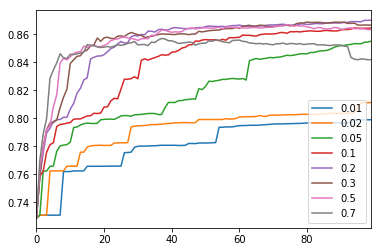

In [30]:
results_eta = [result['validation_0']['auc'] for result in model_results]
results_eta = pd.DataFrame(results_eta).transpose()
results_eta.columns = etas
results_eta.plot.line()

If we limit ourselves to 100 rounds of boosting, we find that the optimal eta must be greater than 0.05 and less than 0.7. I'm almost certain this will change depending on the number of boosting rounds, but at this point in time I don't think it will be worth exploring the interplay thoroughly due to constraints on my hardware. Zooming in for a better look.

In [34]:
print(results_eta.columns,

Float64Index([0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7], dtype='float64') <class 'list'>


(0.0, 99.0, 0.84, 0.89)

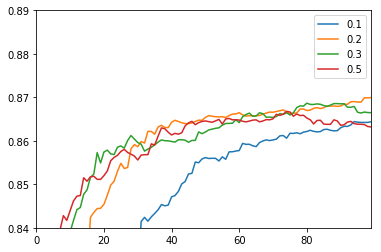

In [39]:
plot = results_eta[[0.1,0.2,0.3,0.5]].plot.line()
plot.axis(ymin=0.84, ymax=0.89)

Upon closer inspection, a value of 0.2 seems to be optimal. Now we repeat the process but for n_estimators, the number of boosting rounds that xgb will implement. This could take a while to compute...

In [ ]:
### I will set n_estimators to 500 and running once as testing for 100, 200, 300, 500 would contain
# the same results neste in each other
eval_set = [(X_val,y_val)]
 

model = xgb.XGBClassifier(
learning_rate = 0.2,
n_estimators = 500,
objective = 'binary:logistic')

model.fit(X_train, y_train, 
      eval_metric = "auc", 
      eval_set= eval_set)

[0]	validation_0-auc:0.728976
[1]	validation_0-auc:0.758629
[2]	validation_0-auc:0.775613
[3]	validation_0-auc:0.789627
[4]	validation_0-auc:0.792915
[5]	validation_0-auc:0.79774
[6]	validation_0-auc:0.799051
[7]	validation_0-auc:0.799201
[8]	validation_0-auc:0.800766
[9]	validation_0-auc:0.800663
[10]	validation_0-auc:0.806523
[11]	validation_0-auc:0.810603
[12]	validation_0-auc:0.817915
[13]	validation_0-auc:0.821419
[14]	validation_0-auc:0.827384
[15]	validation_0-auc:0.828863
[16]	validation_0-auc:0.842391
[17]	validation_0-auc:0.843526
[18]	validation_0-auc:0.844424
[19]	validation_0-auc:0.844482
[20]	validation_0-auc:0.8454
[21]	validation_0-auc:0.847509
[22]	validation_0-auc:0.849813
[23]	validation_0-auc:0.850711


In [ ]:
boosting_rounds = model.evals_results()['validation_0']['auc']

In [ ]:
model = xgb.XGBClassifier(
    max_depth = 300,
    learning_rate = 0.1,
    n_estimators = 100,
    objective = 'binary:logistic'
       
)

rounds = np.arange(1,7)
test_scores = []
for round in rounds:
    model.fit(X_train.iloc[:train_rows,:], y_train.iloc[:train_rows], 
          eval_metric = "auc", 
          eval_set= eval_set,
          early_stopping_rounds = round
         )
    last_val_score = model.evals_result()['validation_0']['auc'][-1]
    
    preds = model.predict_proba(X_test)
    test_score = roc_auc_score(y_test, preds[:,1])
    print(test_score)
    
    scores = [last_val_score, test_score]
    test_scores.append(scores)

In [ ]:
model.evals_result()['validation_0']['auc'][-1]

In [ ]:
print(test_scores)